In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import stumpy
import pandas as pd
from scipy import signal
from sklearn.linear_model import Ridge
from scipy.spatial import distance
# from fatf.utils.kernels import exponential_kernel 

import warnings
warnings.filterwarnings('ignore')
import sys
import os

sys.path.append( '../src/LIMESegment/Utils')


from explanations import LIMESegment, NEVES, LEFTIST, NNSegment, RBP, background_perturb
from data import loadUCRDataID
from models import *
from metrics import *

In [2]:
dataset_map = [('Coffee', 0),
                ('Strawberry', 1),
                   ('GunPointOldVersusYoung', 2),
                   ('HandOutlines', 3),
                    ('yoga', 4),
                    ('ECG200', 5),
                    ('GunPointMaleVersusFemale', 6),
                    ('DodgerLoopGame', 7),
                    ('Chinatown', 8),
                    ('FreezerSmallTrain', 9),
                    ('HouseTwenty', 10),
                    ('WormsTwoClass', 11)
                    ]

In [3]:
datasets = {}
for data_idx in dataset_map:
    datasets[data_idx[0]] = loadUCRDataID(
        train_file = f"../Data/{data_idx[0]}_TRAIN",
        test_file  = f"../Data/{data_idx[0]}_TEST")


Loading train / test dataset :  ../Data/Coffee_TRAIN ../Data/Coffee_TEST
Loading train / test dataset :  ../Data/Strawberry_TRAIN ../Data/Strawberry_TEST


Loading train / test dataset :  ../Data/GunPointOldVersusYoung_TRAIN ../Data/GunPointOldVersusYoung_TEST
Loading train / test dataset :  ../Data/HandOutlines_TRAIN ../Data/HandOutlines_TEST
Loading train / test dataset :  ../Data/yoga_TRAIN ../Data/yoga_TEST
Loading train / test dataset :  ../Data/ECG200_TRAIN ../Data/ECG200_TEST
Loading train / test dataset :  ../Data/GunPointMaleVersusFemale_TRAIN ../Data/GunPointMaleVersusFemale_TEST
Loading train / test dataset :  ../Data/DodgerLoopGame_TRAIN ../Data/DodgerLoopGame_TEST
Loading train / test dataset :  ../Data/Chinatown_TRAIN ../Data/Chinatown_TEST
Loading train / test dataset :  ../Data/FreezerSmallTrain_TRAIN ../Data/FreezerSmallTrain_TEST
Loading train / test dataset :  ../Data/HouseTwenty_TRAIN ../Data/HouseTwenty_TEST
Loading train / test dataset :  ../Data/WormsTwoClass_TRAIN ../Data/WormsTwoClass_TEST


In [4]:
for dataset_name, (train_x,_,_,_,_) in datasets.items():
    print(f"Shape of training data of dataset '{dataset_name}': {train_x.shape}")

Shape of training data of dataset 'Coffee': (28, 286, 1)
Shape of training data of dataset 'Strawberry': (613, 235, 1)
Shape of training data of dataset 'GunPointOldVersusYoung': (136, 150, 1)
Shape of training data of dataset 'HandOutlines': (1000, 2709, 1)
Shape of training data of dataset 'yoga': (300, 426, 1)
Shape of training data of dataset 'ECG200': (100, 96, 1)
Shape of training data of dataset 'GunPointMaleVersusFemale': (135, 150, 1)
Shape of training data of dataset 'DodgerLoopGame': (20, 288, 1)
Shape of training data of dataset 'Chinatown': (20, 24, 1)
Shape of training data of dataset 'FreezerSmallTrain': (28, 301, 1)
Shape of training data of dataset 'HouseTwenty': (40, 2000, 1)
Shape of training data of dataset 'WormsTwoClass': (181, 900, 1)


In [5]:
BATCH_SIZES = [8, 64, 32, 64, 64, 16, 16, 4, 4, 4, 8, 16]
WINDOW_SIZES = [20, 20, 10, 100, 50, 10, 10, 20, 3, 10, 200, 100]
CPS = [5, 5, 4, 8, 5, 3, 4, 5, 2, 5, 8, 6]

In [7]:
models = ['knn','cnn','lstmfcn']
trained_models = {}
i = 0
for data_idx in datasets.keys():
    print(data_idx)
    trained_models[data_idx] = {}
    trained_models[data_idx]['knn'] = train_KNN_model(datasets[data_idx][0],datasets[data_idx][1])
    model_cnn = make_CNN_model(datasets[data_idx][0].shape[1:])
    trained_models[data_idx]['cnn'] = train_CNN_model(model_cnn,
                                                      datasets[data_idx][0],
                                                      datasets[data_idx][1],
                                                      epochs=2,
                                                      batch_size=BATCH_SIZES[i])
    model_lstmfcn = make_LSTMFCN_model(datasets[data_idx][0].shape[1])
    trained_models[data_idx]['lstmfcn'] = train_LSTMFCN_model(model_lstmfcn,
                                                      datasets[data_idx][0],
                                                      datasets[data_idx][1],
                                                      datasets[data_idx][2],
                                                      datasets[data_idx][3],
                                                      epochs=2,
                                                      batch_size=BATCH_SIZES[i])
    i = i + 1

Coffee
Epoch 1/2
3/3 [==============================] - 2s 271ms/step - loss: 0.6689 - sparse_categorical_accuracy: 0.6364 - val_loss: 0.7220 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/2
3/3 [==============================] - 0s 48ms/step - loss: 0.6498 - sparse_categorical_accuracy: 0.6364 - val_loss: 0.7340 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 1/2
4/4 - 7s - loss: 0.4793 - accuracy: 0.7500 - val_loss: 0.6674 - val_accuracy: 0.5714 - lr: 0.0010 - 7s/epoch - 2s/step
Epoch 2/2
4/4 - 0s - loss: 0.1258 - accuracy: 0.9643 - val_loss: 0.6510 - val_accuracy: 0.5357 - lr: 0.0010 - 412ms/epoch - 103ms/step
Strawberry
Epoch 1/2
8/8 [==============================] - 4s 210ms/step - loss: 0.6152 - sparse_categorical_accuracy: 0.6286 - val_loss: 0.6961 - val_sparse_categorical_accuracy: 0.4472
Epoch 2/2
8/8 [==============================] - 1s 126ms/step - loss: 0.5742 - sparse_categorical_accuracy: 0.6592 - val_loss: 0.6998 - val_sparse_categorical_accuracy: 0.4472
Epo

In [12]:
MODEL_TYPES = ['class','proba','proba']

In [13]:
def reshaper(x,j):
    if j == 0:
        return x.reshape(x.shape[0])
    else:
        return x


In [14]:
explanations = {}
i = 0 
noisy_explanations = {} # For Robustness later
for data_idx in datasets.keys():
    print('processing explanations for: ' + str(data_idx) + '\n')
    explanations[data_idx] = {}
    noisy_explanations[data_idx] = {}
    j = 0
    for model_idx in trained_models[data_idx].keys():
        print('processing explanations for: ' + str(model_idx) + '\n')
        explanations[data_idx][model_idx] = {}
        noisy_explanations[data_idx][model_idx] = {}
        explanation_set = datasets[data_idx][2][0:2]
        explanations[data_idx][model_idx]['LS'] = [LIMESegment(reshaper(x,j), trained_models[data_idx][model_idx], model_type=MODEL_TYPES[j], window_size=WINDOW_SIZES[i], cp=CPS[i]) for x in explanation_set]
        explanations[data_idx][model_idx]['N'] = [NEVES(x, trained_models[data_idx][model_idx], datasets[data_idx][0], model_type=MODEL_TYPES[j]) for x in explanation_set]
        explanations[data_idx][model_idx]['LF'] = [LEFTIST(reshaper(x,j), trained_models[data_idx][model_idx], datasets[data_idx][0], model_type=MODEL_TYPES[j],) for x in explanation_set]
        
        noisy_set = np.asarray([add_noise(x) for x in explanation_set])
        
        noisy_explanations[data_idx][model_idx]['LS'] = [LIMESegment(reshaper(x,j), trained_models[data_idx][model_idx], model_type=MODEL_TYPES[j], window_size=WINDOW_SIZES[i], cp=CPS[i]) for x in noisy_set]
        noisy_explanations[data_idx][model_idx]['N'] = [NEVES(x, trained_models[data_idx][model_idx], datasets[data_idx][0], model_type=MODEL_TYPES[j]) for x in noisy_set]
        noisy_explanations[data_idx][model_idx]['LF'] = [LEFTIST(reshaper(x,j), trained_models[data_idx][model_idx], datasets[data_idx][0], model_type=MODEL_TYPES[j],) for x in noisy_set]
        
        j = j + 1
    i = i + 1

processing explanations for: Coffee

processing explanations for: knn



ValueError: Found array with dim 3. Estimator expected <= 2.

In [31]:
evaluation_metrics = {}
for data_idx in datasets.keys():
    evaluation_metrics[data_idx] = {}
    j = 0 
    for model_idx in trained_models[data_idx].keys():
        evaluation_metrics[data_idx][model_idx] = {}
        for explanation_idx in explanations[data_idx][model_idx].keys():
            evaluation_metrics[data_idx][model_idx][explanation_idx] = {}
            # Robustness
            evaluation_metrics[data_idx][model_idx][explanation_idx]['Robustness'] = robustnessy(explanations[data_idx][model_idx][explanation_idx],
                                                                                         noisy_explanations[data_idx][model_idx][explanation_idx])
            explanation_set = datasets[data_idx][2][0:2]
            explanation_labels = datasets[data_idx][3][0:2]
            if j == 0:
                explanation_predictions = trained_models[data_idx][model_idx].predict(explanation_set.reshape(explanation_set.shape[:2]))
            
            else:
                explanation_predictions = trained_models[data_idx][model_idx].predict(explanation_set)
                
                # Faithfulness
            evaluation_metrics[data_idx][model_idx][explanation_idx]['Faithfulness'] = faithfulnessy(explanations[data_idx][model_idx][explanation_idx],explanation_set,explanation_labels,explanation_predictions,trained_models[data_idx][model_idx],model_type=MODEL_TYPES[j])
        j+=1
    

NameError: name 'robustnessy' is not defined

In [57]:
instance = datasets["ECG200"][0][0:-1][11]
model=trained_models["ECG200"]["lstmfcn"]

In [58]:
#window_size=(3,len/2)
#cp=(1,len)

exp=LIMESegment(instance, model, model_type="proba")

# exp=LEFTIST(instance, model, datasets["ECG200"][0], model_type="proba")
# exp=NEVES(instance, model, datasets["ECG200"][0], model_type="proba")

print (exp)

4/4 [==============================] - 0s 21ms/step
(array([-0.23952579, -0.27462696,  0.66460998, -0.01325594]), [0, 12, 28, 46, -1])


# Plotting

Text(0.5, 1.0, 'Attributions for Class')

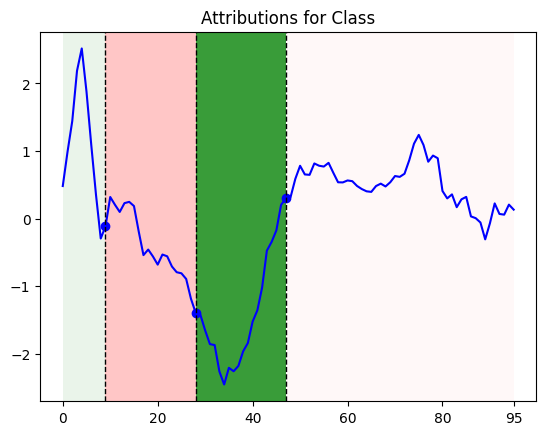

In [56]:
import numpy as np
import matplotlib.pyplot as plt

i=1
p=exp[1][i]
maximp=max(np.max(exp[0]),0)
minimp=min(np.min(exp[0]),0)
scale=maximp-minimp

while p!=-1:
    if exp[0][i-1]>=0:
        plt.axvspan(exp[1][i-1], exp[1][i], color='green', alpha=(exp[0][i-1]/scale), lw=0)
    else:
        plt.axvspan(exp[1][i-1], exp[1][i], color='red', alpha=abs(exp[0][i-1])/scale, lw=0)
    i=i+1
    p=exp[1][i]

if exp[0][i-1]>=0:
    plt.axvspan(exp[1][i-1], len(instance.flatten())-1, color='green', alpha=(exp[0][i-1]/scale), lw=0)
else:
    plt.axvspan(exp[1][i-1], len(instance.flatten())-1, color='red', alpha=abs(exp[0][i-1])/scale, lw=0)
    
plt.plot(range(len(instance.flatten())), instance.flatten(), color='b',lw=1.5)
plt.xticks(list(plt.xticks()[0]) + [len(instance.flatten())-1])

plt.scatter(exp[1][1:-1], [instance.flatten()[idx] for idx in exp[1][1:-1]], color='blue',marker="o") 
for cp in exp[1][1:-1]:
    plt.axvline(x=cp, color='black',linestyle="--",lw=1, label='axvline - full height')
    
plt.title("Attributions for Class")

ValueError: alpha (nan) is outside 0-1 range

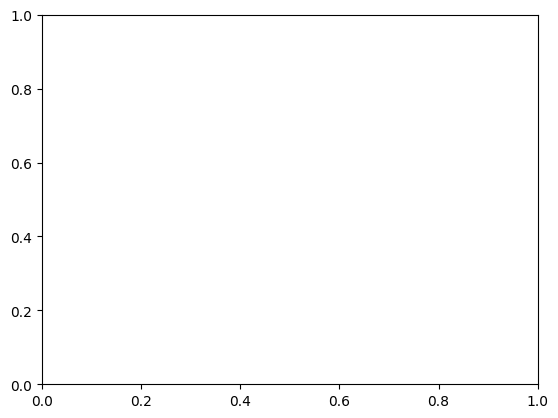

In [ ]:
i=1
maximp=max(np.max(exp[0]),0)
minimp=min(np.min(exp[0]),0)
scale=maximp-minimp

for p in exp[1][:-1]:
    if exp[0][i-1]>=0:
        plt.axvspan(exp[1][i-1], exp[1][i], color='green', alpha=(exp[0][i-1]/scale), lw=0)
    else:
        plt.axvspan(exp[1][i-1], exp[1][i], color='red', alpha=abs(exp[0][i-1])/scale, lw=0)
    i=i+1

if exp[0][i-1]>=0:
    plt.axvspan(exp[1][i-1], len(instance.flatten())-1, color='green', alpha=(exp[0][i-1]/scale), lw=0)
else:
    plt.axvspan(exp[1][i-1], len(instance.flatten())-1, color='red', alpha=abs(exp[0][i-1])/scale, lw=0)
    
plt.plot(range(len(instance.flatten())), instance.flatten(), color='b',lw=1.5)
plt.xticks(list(plt.xticks()[0]) + [len(instance.flatten())-1])

plt.scatter(exp[1][1:-1], [instance.flatten()[idx] for idx in exp[1][1:-1]], color='blue',marker="o") 
for cp in exp[1]:
    plt.axvline(x=cp, color='black',linestyle="--",lw=0.5, label='axvline - full height')

ValueError: alpha (nan) is outside 0-1 range

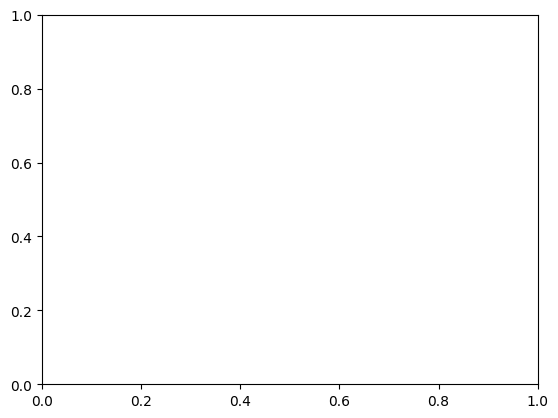

In [ ]:
i=1
maximp=max(np.max(exp[0]),0)
minimp=min(np.min(exp[0]),0)
scale=maximp-minimp

for p in exp[1][:-1]:
    if exp[0][i-1]>=0:
        plt.axvspan(exp[1][i-1], exp[1][i], color='green', alpha=(exp[0][i-1]/scale), lw=0)
    else:
        plt.axvspan(exp[1][i-1], exp[1][i], color='red', alpha=abs(exp[0][i-1])/scale, lw=0)
    i=i+1

if exp[0][i-1]>=0:
    plt.axvspan(exp[1][i-1], len(instance.flatten())-1, color='green', alpha=(exp[0][i-1]/scale), lw=0)
else:
    plt.axvspan(exp[1][i-1], len(instance.flatten())-1, color='red', alpha=abs(exp[0][i-1])/scale, lw=0)
    
plt.plot(range(len(instance.flatten())), instance.flatten(), color='b',lw=1.5)
plt.xticks(list(plt.xticks()[0]) + [len(instance.flatten())-1])

plt.scatter(exp[1][1:-1], [instance.flatten()[idx] for idx in exp[1][1:-1]], color='blue',marker="o") 
for cp in exp[1]:
    plt.axvline(x=cp, color='black',linestyle="--",lw=0.5, label='axvline - full height')

In [ ]:
def pred_func(val):
    return 3*val

class ModelWrapper:
    def predict(self,x):
        return pred_func(x)

In [ ]:
model=ModelWrapper()

In [ ]:
model.predict(8)

24

In [ ]:
datasets["ECG200"][0].shape

(100, 96, 1)

In [ ]:
np.savetxt("ecg200.csv",,delimiter=",")

In [ ]:
np.squeeze(datasets["ECG200"][0],axis=-1).shape

(100, 96)

In [ ]:
import pandas as pd
pd.read_csv("ecg200.csv",header=None)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.502055,0.542163,0.722383,1.428885,2.136516,2.281149,1.936274,1.468890,1.008845,0.380282,...,0.931043,0.610298,0.638894,0.684679,0.583238,0.640522,0.708585,0.705011,0.713815,0.433765
1,0.147647,0.804668,0.367771,0.243894,0.026614,-0.274402,0.096731,-0.747731,-1.609777,-1.179593,...,-0.533503,-0.400228,0.176084,1.111768,2.438428,2.734889,1.736054,0.036857,-1.265074,-0.208024
2,0.316646,0.243199,0.370471,1.063738,1.678187,1.759558,1.697717,1.612159,1.168188,0.499957,...,0.764229,0.610621,0.552900,0.566786,0.604002,0.777068,0.812345,0.748848,0.818042,0.539347
3,1.168874,2.075901,1.760141,1.606446,1.949046,1.302842,0.459332,0.516412,0.852180,0.989227,...,0.419006,0.723888,1.323947,2.136488,1.746597,1.470220,1.893512,1.256949,0.800407,0.731540
4,0.648658,0.752026,2.636231,3.455716,2.118157,0.520620,-0.188627,0.780818,0.933775,0.701402,...,-0.097869,-0.136787,-0.340237,-0.089441,-0.080297,-0.192584,-0.304704,-0.454556,0.314590,0.582190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.581277,0.876188,1.042767,1.796120,2.541399,2.246653,1.500387,1.031521,0.382672,-0.197561,...,1.002770,0.907869,0.916457,0.923975,0.767357,0.656223,0.762357,0.501373,-0.333336,-0.524546
96,2.689017,2.708703,2.008381,2.235800,1.516982,0.029916,-0.561346,-0.793702,-0.979371,-1.288162,...,-0.136610,-0.072176,-0.082738,-0.138468,-0.120396,-0.089411,-0.243141,-0.119710,0.124042,0.273463
97,0.197677,0.455417,0.973110,1.935956,2.259463,1.741341,1.158296,0.418241,-0.071605,-0.241250,...,0.482452,0.325569,0.247991,0.184127,0.050358,0.241988,0.331451,-0.120006,0.042423,0.343293
98,0.179500,1.038409,1.946421,2.705141,1.670706,-0.101167,-1.578876,-0.750906,0.175310,0.064901,...,0.324323,0.330489,0.111953,0.448948,0.567132,0.136757,0.444768,0.151050,0.193378,0.451709


In [ ]:
trained_models["ECG200"]["lstmfcn"]

In [ ]:
from tensorflow import keras

trained_models["ECG200"]["lstmfcn"].save("ECG200LSTM.h5")

In [ ]:
instance.flatten()

array([ 0.50205548,  0.54216265,  0.72238348,  1.4288852 ,  2.1365158 ,
        2.281149  ,  1.9362737 ,  1.46889   ,  1.0088451 ,  0.38028224,
       -0.29677967, -0.51392868, -0.25564469, -0.10720254, -0.28782655,
       -0.41800901, -0.31916313, -0.2603787 , -0.35035721, -0.50548599,
       -0.71088709, -0.82391982, -0.89970154, -1.1539497 , -1.2298306 ,
       -1.044091  , -1.2020312 , -1.3921949 , -1.1301083 , -1.1798666 ,
       -1.6492718 , -1.7265754 , -1.6083704 , -1.6628022 , -1.6506724 ,
       -1.6973094 , -1.8386968 , -1.8025962 , -1.7805361 , -1.8251665 ,
       -1.6447633 , -1.4238097 , -1.3921949 , -1.3604156 , -1.2001781 ,
       -0.91863234, -0.68591581, -0.66794346, -0.51272154, -0.10169069,
        0.06395426,  0.08261431,  0.23760718,  0.17479318,  0.12320539,
        0.5033942 ,  0.6838702 ,  0.47499476,  0.53279711,  0.72354995,
        0.6644198 ,  0.64793559,  0.75705403,  0.7320716 ,  0.62021499,
        0.60629677,  0.67795016,  0.68908363,  0.59880728,  0.54

In [ ]:
datasets["ECG200"][1].shape

(100, 1)

array([[ 0.50205548,  0.54216265,  0.72238348, ...,  0.71381545,
         0.43376464,  0.        ],
       [ 0.1476469 ,  0.8046684 ,  0.36777149, ..., -1.2650744 ,
        -0.20802439,  1.        ],
       [ 0.31664616,  0.24319908,  0.37047144, ...,  0.81804204,
         0.53934704,  0.        ],
       ...,
       [ 0.19767692,  0.45541658,  0.97310983, ...,  0.04242264,
         0.34329344,  0.        ],
       [ 0.17950028,  1.0384092 ,  1.9464212 , ...,  0.19337751,
         0.45170853,  1.        ],
       [ 0.07312418,  0.77605406,  2.181336  , ..., -0.17844792,
        -0.25605159,  1.        ]])

In [ ]:
np.squeeze(datasets["ECG200"][0],axis=-1).shape

(100, 96)

In [ ]:
df=pd.DataFrame(np.concatenate([np.squeeze(datasets["ECG200"][0],axis=-1),datasets["ECG200"][1]],axis=1))

In [ ]:
df=df.rename(columns={96:"Class"})

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,Class
0,0.502055,0.542163,0.722383,1.428885,2.136516,2.281149,1.936274,1.468890,1.008845,0.380282,...,0.610298,0.638894,0.684679,0.583238,0.640522,0.708585,0.705011,0.713815,0.433765,0.0
1,0.147647,0.804668,0.367771,0.243894,0.026614,-0.274402,0.096731,-0.747731,-1.609777,-1.179593,...,-0.400228,0.176084,1.111768,2.438428,2.734889,1.736054,0.036857,-1.265074,-0.208024,1.0
2,0.316646,0.243199,0.370471,1.063738,1.678187,1.759558,1.697717,1.612159,1.168188,0.499957,...,0.610621,0.552900,0.566786,0.604002,0.777068,0.812345,0.748848,0.818042,0.539347,0.0
3,1.168874,2.075901,1.760141,1.606446,1.949046,1.302842,0.459332,0.516412,0.852180,0.989227,...,0.723888,1.323947,2.136488,1.746597,1.470220,1.893512,1.256949,0.800407,0.731540,0.0
4,0.648658,0.752026,2.636231,3.455716,2.118157,0.520620,-0.188627,0.780818,0.933775,0.701402,...,-0.136787,-0.340237,-0.089441,-0.080297,-0.192584,-0.304704,-0.454556,0.314590,0.582190,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.581277,0.876188,1.042767,1.796120,2.541399,2.246653,1.500387,1.031521,0.382672,-0.197561,...,0.907869,0.916457,0.923975,0.767357,0.656223,0.762357,0.501373,-0.333336,-0.524546,1.0
96,2.689017,2.708703,2.008381,2.235800,1.516982,0.029916,-0.561346,-0.793702,-0.979371,-1.288162,...,-0.072176,-0.082738,-0.138468,-0.120396,-0.089411,-0.243141,-0.119710,0.124042,0.273463,0.0
97,0.197677,0.455417,0.973110,1.935956,2.259463,1.741341,1.158296,0.418241,-0.071605,-0.241250,...,0.325569,0.247991,0.184127,0.050358,0.241988,0.331451,-0.120006,0.042423,0.343293,0.0
98,0.179500,1.038409,1.946421,2.705141,1.670706,-0.101167,-1.578876,-0.750906,0.175310,0.064901,...,0.330489,0.111953,0.448948,0.567132,0.136757,0.444768,0.151050,0.193378,0.451709,1.0


In [ ]:
df.to_csv("ECG200LSTM.csv",index=None)

In [ ]:
np.expand_dims(df.to_numpy(),axis=-1).shape

(100, 97, 1)

In [ ]:
datasets["ECG200"][0].shape

(100, 96, 1)

In [ ]:
import pandas as pd

pd.read_csv("ECG200LSTM.csv",header=0)["Class"].to_numpy().shape

(100,)